In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv("asteroids_data.csv")

In [3]:
data.head()

,Asteroid,Year,Eccentricity,SemiMajorAxis_AU,Velocity_km_s,AngularVelocity_deg_s,Inclination_deg,Diameter_m,Energy_kilotons,Latitude,Longitude,BlastRadius_km,Location
0,Tunguska,1908,0.9,1.0,21.646419,12.838289,0.5,50,4.708040e+05,60.89,101.89,30,Siberia
1,Chelyabinsk,2014,0.7,1.2,15.368648,17.671890,0.4,20,4.725978e+02,54.82,61.11,19,Russia
2,Chicxulub,-65999998,0.1,1.5,18.653608,12.605686,0.2,10000,1.069276e+08,21.40,-89.50,12,Mexico
3,MeteorCrater,-49997,0.2,1.1,16.432634,16.140114,0.3,50,1.036590e+04,35.00,-111.00,15,Arizona


In [4]:
data = data.drop(columns=["Asteroid","Year","Energy_kilotons","Latitude","Longitude","Location","AngularVelocity_deg_s","Diameter_m"])

In [5]:
data.head()

,Eccentricity,SemiMajorAxis_AU,Velocity_km_s,Inclination_deg,BlastRadius_km
0,0.9,1.0,21.646419,0.5,30
1,0.7,1.2,15.368648,0.4,19
2,0.1,1.5,18.653608,0.2,12
3,0.2,1.1,16.432634,0.3,15


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

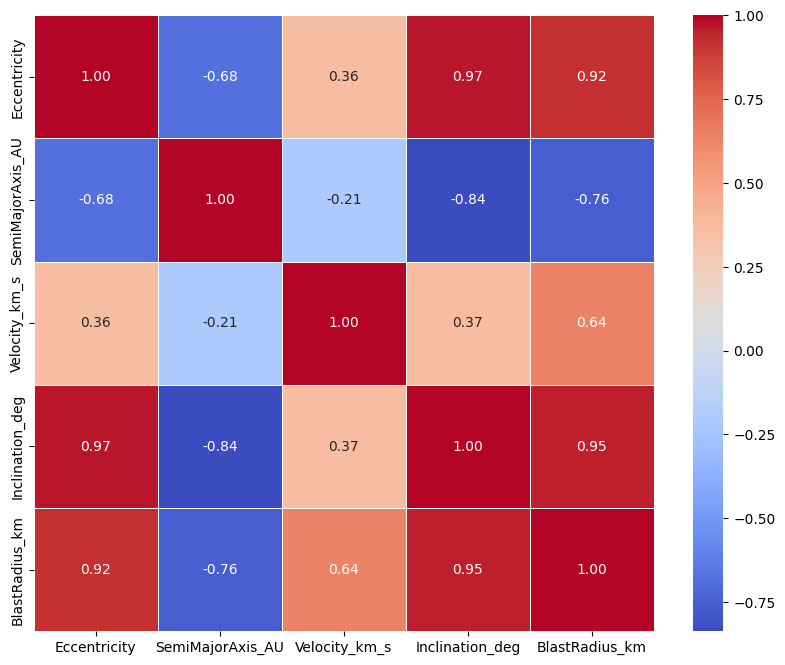

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [8]:
y = data["BlastRadius_km"]
x = data.drop(columns=["BlastRadius_km"])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
mradius = LinearRegression()

mradius.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred = mradius.predict(x_test)

In [13]:
blast_mae = mean_absolute_error(y_test, y_pred)

In [14]:
print("Blast radius evaluation:")
print(f"  MAE:  {blast_mae} km")

Blast radius evaluation:
  MAE:  1.0436520285324598 km


In [15]:
import joblib

In [16]:
joblib.dump(mradius, "model_blast_radius.pkl")

['model_blast_radius.pkl']